# Import Libaries

In [1]:
import numpy as np
import pandas as pd

# Importing Data

In [2]:
crop = pd.read_csv("Crop Recommendation FYP.csv")
crop.head()

,N,P,K,temperature,humidity,ph,rainfall,label
0,14,140,197,23.352251,90.900547,6.071255,113.038138,apple
1,67,35,22,23.305468,63.246480,6.385684,108.760300,maize
2,54,61,77,18.811981,15.216182,6.206582,77.542942,chickpea
3,86,26,27,27.131404,52.893683,6.081173,192.428038,coffee
4,1,135,203,22.778565,92.701240,5.624203,113.775922,apple


In [3]:
crop.shape

(2600, 8)

In [4]:
crop.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2600 entries, 0 to 2599
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   N            2600 non-null   int64  
 1   P            2600 non-null   int64  
 2   K            2600 non-null   int64  
 3   temperature  2600 non-null   float64
 4   humidity     2600 non-null   float64
 5   ph           2600 non-null   float64
 6   rainfall     2600 non-null   float64
 7   label        2600 non-null   object 
dtypes: float64(4), int64(3), object(1)
memory usage: 162.6+ KB


In [5]:
crop.isnull().sum()

N              0
P              0
K              0
temperature    0
humidity       0
ph             0
rainfall       0
label          0
dtype: int64

In [6]:
crop.duplicated().sum()

0

In [7]:
crop.describe()

,N,P,K,temperature,humidity,ph,rainfall
count,2600.000000,2600.000000,2600.000000,2600.000000,2600.000000,2600.000000,2600.000000
mean,46.595385,55.081923,48.537692,25.119436,67.348084,6.446438,104.650782
std,35.662770,32.668467,50.703251,5.197857,25.572621,0.800625,52.250478
min,0.000000,5.000000,5.000000,8.825675,14.258040,3.504752,20.211267
25%,19.000000,29.000000,20.000000,21.593430,52.100108,5.902033,67.590156
50%,34.000000,55.000000,31.000000,25.063371,78.036830,6.397008,97.779524
75%,78.000000,70.000000,50.000000,28.286099,89.719442,6.924721,124.602815
max,140.000000,145.000000,205.000000,43.675493,99.981876,9.935091,298.560117


In [8]:
crop['label'].value_counts()

label
apple          100
maize          100
pulses         100
mungbean       100
lentil         100
kidneybeans    100
millets        100
banana         100
wheat          100
coconut        100
grapes         100
mothbeans      100
mango          100
muskmelon      100
papaya         100
rice           100
watermelon     100
sugarcane      100
jute           100
blackgram      100
pigeonpeas     100
orange         100
cotton         100
coffee         100
chickpea       100
pomegranate    100
Name: count, dtype: int64

In [9]:
crop['label'].unique()

array(['apple', 'maize', 'chickpea', 'coffee', 'cotton', 'orange',
       'pigeonpeas', 'blackgram', 'jute', 'sugarcane', 'watermelon',
       'rice', 'papaya', 'muskmelon', 'mango', 'mothbeans', 'grapes',
       'coconut', 'wheat', 'banana', 'millets', 'kidneybeans', 'lentil',
       'mungbean', 'pulses', 'pomegranate'], dtype=object)

# Encoding

In [10]:
crop_dict = {
    'rice': 1,
    'maize': 2,
    'chickpea': 3,
    'kidneybeans': 4,
    'pigeonpeas': 5,
    'mothbeans': 6,
    'mungbean': 7,
    'blackgram': 8,
    'lentil': 9,
    'pomegranate': 10,
    'banana': 11,
    'mango': 12,
    'grapes': 13,
    'watermelon': 14,
    'muskmelon': 15,
    'apple': 16,
    'orange': 17,
    'papaya': 18,
    'coconut': 19,
    'cotton': 20,
    'jute': 21,
    'coffee': 22,
    'wheat' : 23,
    'millets' : 24,
    'pulses' : 25,
    'sugarcane' : 26
    
}
crop['crop_num']=  crop['label'].map(crop_dict)

In [11]:
crop

,N,P,K,temperature,humidity,ph,rainfall,label,crop_num
0,14,140,197,23.352251,90.900547,6.071255,113.038138,apple,16
1,67,35,22,23.305468,63.246480,6.385684,108.760300,maize,2
2,54,61,77,18.811981,15.216182,6.206582,77.542942,chickpea,3
3,86,26,27,27.131404,52.893683,6.081173,192.428038,coffee,22
4,1,135,203,22.778565,92.701240,5.624203,113.775922,apple,16
...,...,...,...,...,...,...,...,...,...
2595,10,5,5,21.213070,91.353492,7.817846,112.983436,orange,17
2596,108,94,47,27.359116,84.546250,6.387431,90.812505,banana,11
2597,11,36,31,27.920633,51.779659,6.475449,100.258567,mango,12
2598,11,124,204,13.429886,80.066340,6.361141,71.400430,grapes,13


In [12]:
crop.drop(['label'],axis=1,inplace=True)
crop.head()

,N,P,K,temperature,humidity,ph,rainfall,crop_num
0,14,140,197,23.352251,90.900547,6.071255,113.038138,16
1,67,35,22,23.305468,63.246480,6.385684,108.760300,2
2,54,61,77,18.811981,15.216182,6.206582,77.542942,3
3,86,26,27,27.131404,52.893683,6.081173,192.428038,22
4,1,135,203,22.778565,92.701240,5.624203,113.775922,16


# Train Test Split

In [13]:
X = crop.drop(['crop_num'],axis=1)
y = crop['crop_num']

In [14]:
X

,N,P,K,temperature,humidity,ph,rainfall
0,14,140,197,23.352251,90.900547,6.071255,113.038138
1,67,35,22,23.305468,63.246480,6.385684,108.760300
2,54,61,77,18.811981,15.216182,6.206582,77.542942
3,86,26,27,27.131404,52.893683,6.081173,192.428038
4,1,135,203,22.778565,92.701240,5.624203,113.775922
...,...,...,...,...,...,...,...
2595,10,5,5,21.213070,91.353492,7.817846,112.983436
2596,108,94,47,27.359116,84.546250,6.387431,90.812505
2597,11,36,31,27.920633,51.779659,6.475449,100.258567
2598,11,124,204,13.429886,80.066340,6.361141,71.400430


In [15]:
y

0       16
1        2
2        3
3       22
4       16
        ..
2595    17
2596    11
2597    12
2598    13
2599     9
Name: crop_num, Length: 2600, dtype: int64

In [16]:
y.shape

(2600,)

In [17]:
from sklearn.model_selection import train_test_split

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [19]:
X_train

,N,P,K,temperature,humidity,ph,rainfall
582,34,133,202,15.314135,80.097114,5.804799,74.821447
48,118,50,19,22.956041,82.337337,6.360812,66.483393
1772,32,129,201,16.362519,83.004716,6.487546,71.556655
964,97,8,52,24.910323,86.971900,6.237862,49.485757
2213,80,30,25,26.240922,65.643814,7.487267,148.377120
...,...,...,...,...,...,...,...
1638,34,76,80,20.656918,15.845726,7.985417,65.238111
1095,67,55,44,26.284017,75.146402,7.251847,182.268545
1130,114,40,17,24.326305,80.134564,6.363406,69.450721
1294,74,43,23,25.952633,61.890822,6.325235,99.579812



# Scale the features using MinMaxScaler

In [20]:
from sklearn.preprocessing import MinMaxScaler
ms = MinMaxScaler()

X_train = ms.fit_transform(X_train)
X_test = ms.transform(X_test)

In [21]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [22]:
X_train

array([[-3.60591950e-01,  2.35652831e+00,  3.00085545e+00, ...,
         4.86609438e-01, -8.16679695e-01, -5.71825980e-01],
       [ 1.99976417e+00, -1.50796782e-01, -5.87974498e-01, ...,
         5.74321648e-01, -1.08107345e-01, -7.31911948e-01],
       [-4.16790905e-01,  2.23569337e+00,  2.98124435e+00, ...,
         6.00451780e-01,  5.34002276e-02, -6.34508156e-01],
       ...,
       [ 1.88736626e+00, -4.52884143e-01, -6.27196683e-01, ...,
         4.88075727e-01, -1.04801761e-01, -6.74940918e-01],
       [ 7.63387153e-01, -3.62257935e-01, -5.09530128e-01, ...,
        -2.26227798e-01, -1.53446074e-01, -9.64791985e-02],
       [-4.44890382e-01,  2.46898324e-04, -5.29141220e-01, ...,
        -1.81394647e+00, -7.29546778e-01,  8.87136943e-02]])

# Training Models

Logistic Regression       Accuracy: 0.7692
Naive Bayes               Accuracy: 0.8135
Support Vector Machine    Accuracy: 0.8135
K-Nearest Neighbors       Accuracy: 0.7769
Decision Tree             Accuracy: 0.7077
Random Forest             Accuracy: 0.7250
Bagging                   Accuracy: 0.7192


C:\Users\Hp\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


AdaBoost                  Accuracy: 0.0904
Gradient Boosting         Accuracy: 0.7154
Extra Trees               Accuracy: 0.6577


C:\Users\Hp\AppData\Local\Temp\ipykernel_2364\201979834.py:42: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(


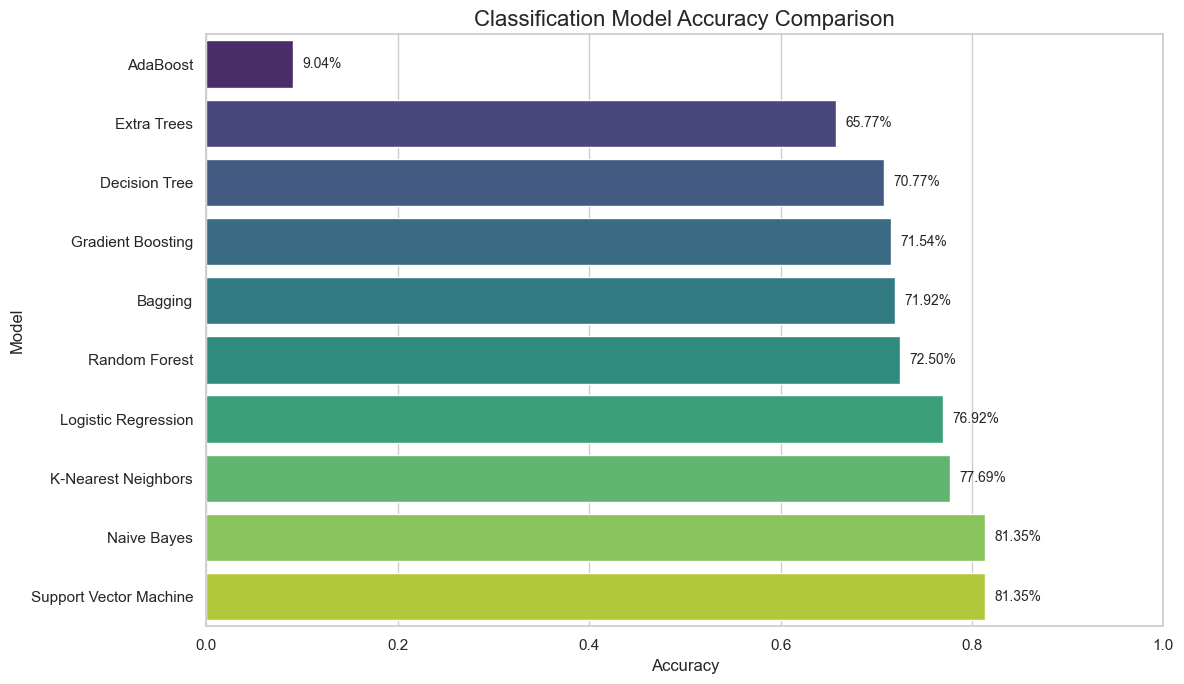

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier, ExtraTreeClassifier
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.metrics import accuracy_score
import pandas as pd

# Define the models
models = {
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'Naive Bayes': GaussianNB(),
    'Support Vector Machine': SVC(),
    'K-Nearest Neighbors': KNeighborsClassifier(),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'Bagging': BaggingClassifier(),
    'AdaBoost': AdaBoostClassifier(),
    'Gradient Boosting': GradientBoostingClassifier(),
    'Extra Trees': ExtraTreeClassifier(),
}

# Store results
results = []

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    results.append({'Model': name, 'Accuracy': acc})
    print(f"{name:<25} Accuracy: {acc:.4f}")

# Create DataFrame for plotting
results_df = pd.DataFrame(results).sort_values(by='Accuracy', ascending=True)

# Plot settings
sns.set(style="whitegrid")
plt.figure(figsize=(12, 7))
ax = sns.barplot(
    data=results_df,
    x="Accuracy",
    y="Model",
    palette="viridis"
)

# Annotate accuracy values on bars
for i in ax.patches:
    ax.text(
        i.get_width() + 0.01,
        i.get_y() + i.get_height() / 2,
        f"{i.get_width():.2%}",
        va='center',
        fontsize=10
    )

plt.title("Classification Model Accuracy Comparison", fontsize=16)
plt.xlabel("Accuracy", fontsize=12)
plt.ylabel("Model", fontsize=12)
plt.xlim(0, 1)
plt.tight_layout()
plt.show()


In [24]:
# or gausianjb
grd = GaussianNB()
grd.fit(X_train,y_train)
ypred = grd.predict(X_test)
accuracy_score(y_test,ypred)

0.8134615384615385

# Predictive System

In [25]:
def recommendation(N,P,k,temperature,humidity,ph,rainfall):
    features = np.array([[N,P,k,temperature,humidity,ph,rainfall]])
    ms_features = ms.fit_transform(features)
    sc_ms_features = sc.fit_transform(ms_features)
    prediction = grd.predict(sc_ms_features).reshape(1,-1)
    print(prediction)
    return prediction[0] 

In [26]:
crop.head()

,N,P,K,temperature,humidity,ph,rainfall,crop_num
0,14,140,197,23.352251,90.900547,6.071255,113.038138,16
1,67,35,22,23.305468,63.246480,6.385684,108.760300,2
2,54,61,77,18.811981,15.216182,6.206582,77.542942,3
3,86,26,27,27.131404,52.893683,6.081173,192.428038,22
4,1,135,203,22.778565,92.701240,5.624203,113.775922,16


In [27]:
# new inputs


N = 0
P = 10
k = 20
temperature = 26.49109
humidity = 81.604873
ph = 7.038096
rainfall = 202.935536

predict = recommendation(N,P,k,temperature,humidity,ph,rainfall)


[[21]]


In [28]:
# new inputs 2


N = 100
P = 50
k = 20
temperature = 32.0
humidity = 70.0
ph = 6
rainfall = 110.0

predict = recommendation(N,P,k,temperature,humidity,ph,rainfall)

predict

[[21]]


array([21], dtype=int64)

In [29]:
import pickle
pickle.dump(grd,open('model.pkl','wb'))
pickle.dump(ms,open('minmaxscaler.pkl','wb'))
pickle.dump(sc,open('standardscaler.pkl','wb'))